In [6]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

     |████████████████████████████████| 195.7 MB 84 kB/s  eta 0:00:01
     |████████████████████████████████| 6.0 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 698 kB/s eta 0:00:01
     |████████████████████████████████| 462 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 4.5 MB/s eta 0:00:011
     |████████████████████████████████| 1.2 MB 567 kB/s eta 0:00:01
     |████████████████████████████████| 3.7 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 129 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 4.1 MB/s eta 0:00:01
  Created wheel for wrapt: filename=wrapt-1.12.1-

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime

%matplotlib inline
plt.style.use('fivethirtyeight')

from sklearn.metrics import mean_squared_error

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [15]:
from datetime import datetime

In [6]:
pip install python-binance

     |████████████████████████████████| 58 kB 2.0 MB/s eta 0:00:011
     |████████████████████████████████| 648 kB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 279 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 124 kB 4.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
from binance.client import Client
api_key = 'xVM7IUXNFne6yrZyGnHM605GdDUCQaoumMv8sEfKO6LeMdpo9XfzeoDgGOalhjoi'
secret = 'OhAFhj9WccUT1N3qrpJiXERXvI1PbsOVx6GgWAZmH7HgYr775l7N286CFQ4ZKh7B'
client = Client(api_key, secret)

In [17]:
candles = client.get_klines(symbol = 'BTCUSDT', interval = Client.KLINE_INTERVAL_30MINUTE) 

In [18]:
len(candles)

500

In [19]:
candles[499]

[1622412000000,
 '35939.61000000',
 '36048.30000000',
 '35800.42000000',
 '35956.56000000',
 '612.74421000',
 1622413799999,
 '22009069.28590840',
 15826,
 '295.37843800',
 '10612533.84060228',
 '0']

In [20]:
price = np.array([float(candles[i][4]) for i in range(500)])

In [21]:
time = np.array([int(candles[i][0]) for i in range(500)])

t = np.array([datetime.fromtimestamp(time[i]/1000).strftime('%H:%M:%S') for i in range(500)])

In [22]:
price.shape

(500,)

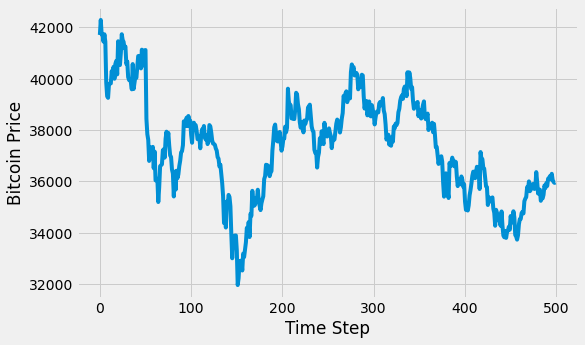

In [23]:
plt.figure(figsize = (8,5));
plt.xlabel('Time Step');
plt.ylabel('Bitcoin Price')
plt.plot(price);

In [24]:
timeframe = pd.DataFrame({'Time':t, 'Price $BTC': price})
timeframe

,Time,Price $BTC
0,08:30:00,41699.99
1,09:00:00,42281.81
2,09:30:00,41713.33
3,10:00:00,41714.99
4,10:30:00,41439.32
...,...,...
495,16:00:00,36293.22
496,16:30:00,36050.00
497,17:00:00,35974.96
498,17:30:00,35940.45


In [25]:
len(price)

500

In [26]:
price = price.reshape(500,1)

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [28]:
scaler.fit(price[:374])

StandardScaler()

In [29]:
price = scaler.transform(price)

In [30]:
df = pd.DataFrame(price.reshape(100,5), columns = ['First', 'Second', 'Third', 'Fourth', 'Target'])
# Here First, Second, Third, Fourth are the seconds over which it is trained 
# and target is the value which will be predicted

In [31]:
df.head()

,First,Second,Third,Fourth,Target
0,1.968970,2.275603,1.976000,1.976875,1.831591
1,1.981703,1.828197,0.988927,0.710337,0.677715
2,0.959915,0.972869,0.973870,1.227042,1.134191
3,1.313827,1.069277,1.375936,1.435880,1.158887
4,1.838131,1.593529,1.350587,1.601002,1.982462


## Train - Test Split

In [32]:
# 75% train, 25% test

x_train = df.iloc[:74, :4]
y_train = df.iloc[:74, -1]

x_test = df.iloc[75:99, :4]
y_test = df.iloc[75:99, -1]

In [33]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [34]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [35]:
x_train.shape , x_test.shape

((74, 4, 1), (24, 4, 1))

In [1]:
model = Sequential()

model.add(LSTM(20, return_sequences = True, input_shape = (4, 1)))
model.add(LSTM(40, return_sequences = False))
model.add(Dense(1, activation='linear'))
model.compile(loss = 'mse', optimizer='rmsprop')

model.summary()

NameError: name 'Sequential' is not defined

In [37]:
model.fit(x_train, y_train, batch_size=5, epochs = 100)

Epoch 1/100
15/15 [==============================] - 21s 6ms/step - loss: 0.7506
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5436
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3450
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1610
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1067
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1179
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1094
Epoch 8/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1472
Epoch 9/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1193
Epoch 10/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0983
Epoch 11/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0926
Epoch 12/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1163
Epoch 13/100
15/15 [================

In [38]:
y_pred = model.predict(x_test)

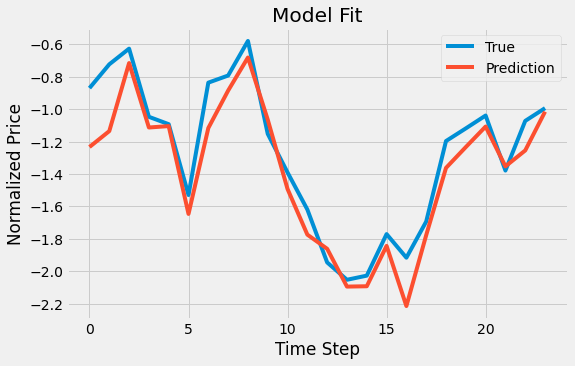

In [39]:
plt.figure(figsize = [8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Normalized Price')
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Prediction')
plt.legend()

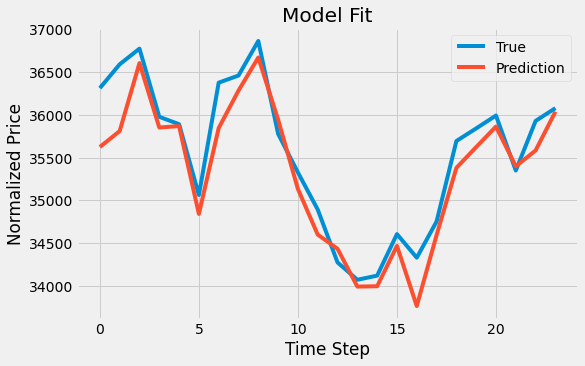

In [40]:
# we need to inverse tranform to check the original values, since we had scaled it previously

plt.figure(figsize = [8,5])
plt.title('Model Fit')
plt.xlabel('Time Step')
plt.ylabel('Normalized Price')
plt.plot(scaler.inverse_transform(y_test), label='True')
plt.plot(scaler.inverse_transform(y_pred), label='Prediction')
plt.legend()

In [41]:
testScore = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(y_pred)))
print ('Test Score {} RMSE'.format(testScore))

Test Score 314.57862043819586 RMSE


In [43]:
from keras.layers import GRU

model1 = Sequential()

model1.add(GRU(20, return_sequences = True, input_shape = (5, 1)))
model1.add(GRU(40, return_sequences = False))
model1.add(Dense(1, activation='linear'))
model1.compile(loss = 'mse', optimizer='rmsprop')

model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 5, 20)             1380      
_________________________________________________________________
gru_1 (GRU)                  (None, 40)                7440      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 8,861
Trainable params: 8,861
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(x_train, y_train, batch_size=5, epochs = 100)

Epoch 1/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0469
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0455
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0475
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0446
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0458
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0473
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0452
Epoch 8/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0455
Epoch 9/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0458
Epoch 10/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 11/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0462
Epoch 12/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0433
Epoch 13/100
15/15 [=================

In [45]:
y_pred = model.predict(x_test)

In [46]:
testScore = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(y_pred)))
print ('Test Score {} RMSE'.format(testScore))

Test Score 335.4069849077579 RMSE


In [84]:
from sklearn.metrics import r2_score

In [85]:
print ('RSquared :', '{:.2%}'.format(r2_score(y_test,y_pred)))

# Here it is negative because the value of bitcoin is decreasing

RSquared : 68.18%


In [86]:
model.save('Bitcoin_model_min.h5')

In [89]:
from keras.models import load_model

# load model
# Bitcoin_model
# Bitcoin_model_min
model = load_model('Bitcoin_model.h5')

# summarize model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 4, 20)             1760      
_________________________________________________________________
lstm_3 (LSTM)                (None, 40)                9760      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 11,561
Trainable params: 11,561
Non-trainable params: 0
_________________________________________________________________


In [90]:
from keras.models import load_model

# load model
# Bitcoin_model
# Bitcoin_model_min
model = load_model('Bitcoin_model_min.h5')

# summarize model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 4, 20)             1760      
_________________________________________________________________
lstm_5 (LSTM)                (None, 40)                9760      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 11,561
Trainable params: 11,561
Non-trainable params: 0
_________________________________________________________________
